<a id="table-of-contents"></a>

<div style="background:#2b6684;color:white; font-family:'Goudy Old Style';padding:0.5em;border-radius:0.2em;font-size:30px;color:white"><u>Chapter 4</u></div>
<div style="background:#2b6684;color:white; font-family:'Goudy Old Style';padding:0.5em;border-radius:0.2em;font-size:30px;color:white"><u>Evaluation</u>    
<p style="font-family:cursive;font-size:17px; color:white" >Notebook is a part of FREE ML course by Glexey Grigorev
<a style="font-family:cursive;font-size:17px; color: yellow" href="https://datatalks.club/courses/2021-winter-ml-zoomcamp.html" target="_blank"> <u>Link for the Course</u></a></p>
<li style = "line-height: 0.7"><a style="font-family:cursive;font-size:17px; color:#ecfe15" href = "#1">1. Getting ready for Evaluation</a></li>   
<li style = "line-height: 0.7"><a style="font-family:cursive;font-size:17px; color:#ecfe15" href = "#2">2. Accuracy and dummy model</a></li> 
<li style = "line-height: 0.7"><a style="font-family:cursive;font-size:17px; color:#ecfe15" href = "#3">3. Confusion Matrix </a></li>
<li style = "line-height: 0.7"><a style="font-family:cursive;font-size:17px; color:#ecfe15" href = "#4"> 4. Precision and Recall  </a></li> 
<li style = "line-height: 0.7"><a style="font-family:cursive;font-size:17px; color:#ecfe15" href = "#5"> 5. ROC Curves </a></li>  
    <ul>
<li style = "line-height: 0.7"><a style="font-family:cursive;font-size:17px; color:#ecfe15" href = "#5.1"> 5.1 Random model</a></li>
<li style = "line-height: 0.7"><a style="font-family:cursive;font-size:17px; color:#ecfe15" href = "#5.2"> 5.2 Ideal model</a></li> 
<li style = "line-height: 0.7"><a style="font-family:cursive;font-size:17px; color:#ecfe15" href = "#5.3"> 5.3 Putting everything together</a></li>             
</ul>
<li style = "line-height: 0.7"><a style="font-family:cursive;font-size:17px; color:#ecfe15" href = "#6"> 6. ROC AUC</a></li> 
<li style = "line-height: 0.7"><a style="font-family:cursive;font-size:17px; color:#ecfe15" href = "#7">7. Cross-Validation</a></li>     
    
</div>    

[back to top](#table-of-contents)
<a id="1"></a>

<div style="background:#2b6684;color:white; font-family:'Goudy Old Style';padding:0.5em;border-radius:0.2em;font-size:25px;color:yellow">1. Getting ready for Evaluation
    
</div>

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import auc

plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

In [7]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

--2021-10-05 12:49:21--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘WA_Fn-UseC_-Telco-Customer-Churn.csv.2’

WA_Fn-UseC_-Telco-C 100%[===================>] 954.59K  --.-KB/s    in 0.05s   

2021-10-05 12:49:21 (20.1 MB/s) - ‘WA_Fn-UseC_-Telco-Customer-Churn.csv.2’ saved [977501/977501]



In [8]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)


df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]


dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

[back to top](#table-of-contents)
<a id="2"></a>

<div style="background:#2b6684;color:white; font-family:'Goudy Old Style';padding:0.5em;border-radius:0.2em;font-size:25px;color:yellow">2. Accuracy and dummy model
    
</div>

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

In [11]:
"""Let's check the accuracy with different threshold"""
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


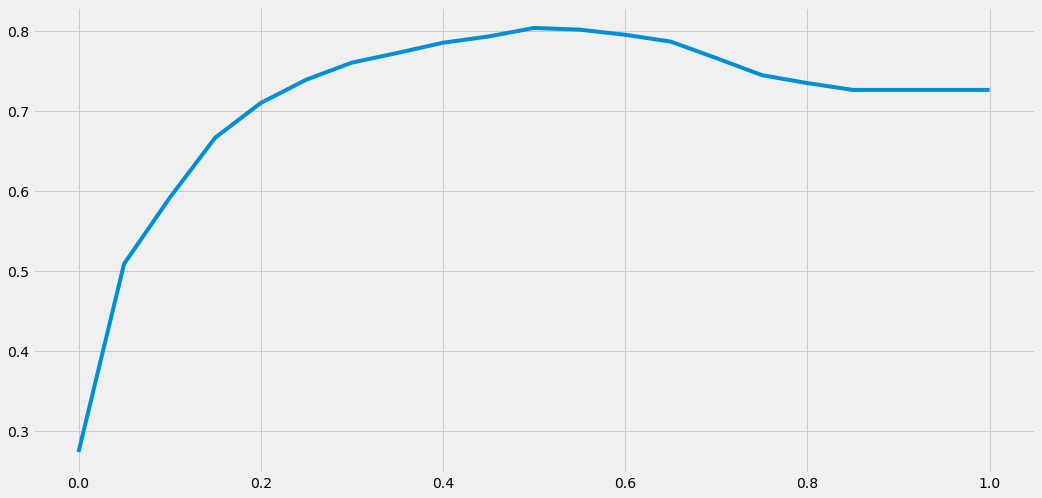

In [12]:
"""Let's plot these results"""
plt.plot(thresholds, scores);

In [13]:
"""Also, our data is not balanced"""
df['churn'].mean()

0.2653698707936959

**Observation:**
- **We can see that when all the predictions are False our model gives accuracy of ``0.726``**
- **This is because our data is ``not balanced`` . One class is way more than in numbers than the other.**
 

[back to top](#table-of-contents)
<a id="3"></a>

<div style="background:#2b6684;color:white; font-family:'Goudy Old Style';padding:0.5em;border-radius:0.2em;font-size:25px;color:yellow">3. Confusion Matrix
    
</div>

In [14]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
"""Confusion Matrix in frequency Form"""
confusion_matrix

array([[922, 101],
       [176, 210]])

In [15]:
"""Confusion Matrix in percentage Form"""
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

[back to top](#table-of-contents)
<a id="4"></a>

<div style="background:#2b6684;color:white; font-family:'Goudy Old Style';padding:0.5em;border-radius:0.2em;font-size:25px;color:yellow">4. Precision and Recall
    
</div>

In [16]:
"""Precision"""
p = tp / (tp + fp)
print(p)
"""Recall"""
r = tp / (tp + fn)
print(r)

0.6752411575562701
0.5440414507772021


[back to top](#table-of-contents)
<a id="5"></a>

<div style="background:#2b6684;color:white; font-family:'Goudy Old Style';padding:0.5em;border-radius:0.2em;font-size:25px;color:yellow">5. ROC Curves
    
</div>




In [17]:
"""TPR"""
tpr = tp / (tp + fn)
print(tpr)
"""FRP"""
fpr = fp / (fp + tn)
print(fpr)

0.5440414507772021
0.09872922776148582


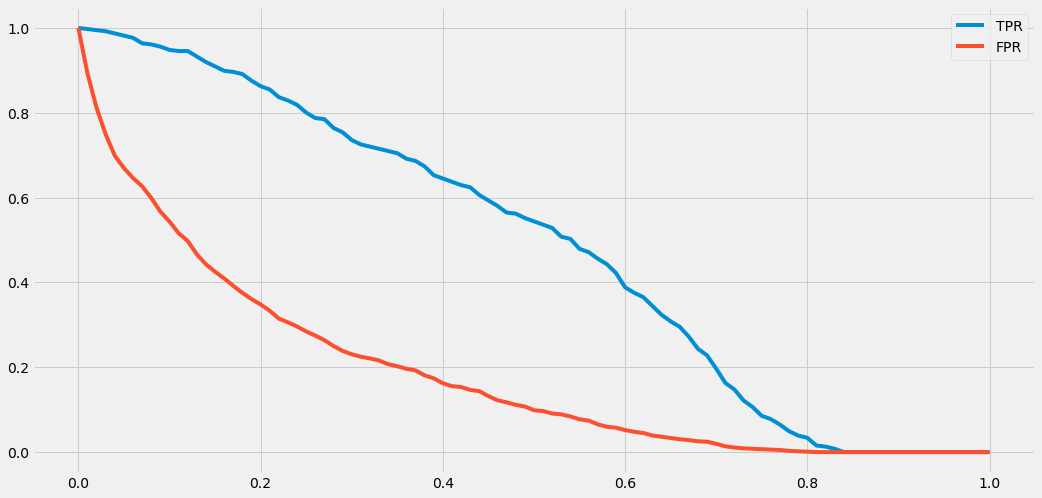

In [18]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))
    


columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)




plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend();
    

In [19]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,385,913,1,110,0.997409,0.892473
2,0.02,384,830,2,193,0.994819,0.811339
3,0.03,383,766,3,257,0.992228,0.748778
4,0.04,381,715,5,308,0.987047,0.698925
...,...,...,...,...,...,...,...
96,0.96,0,0,386,1023,0.000000,0.000000
97,0.97,0,0,386,1023,0.000000,0.000000
98,0.98,0,0,386,1023,0.000000,0.000000
99,0.99,0,0,386,1023,0.000000,0.000000


[back to top](#table-of-contents)
<a id="5.1"></a>

<div style="background:#59a1c6;color:black; font-family:'Goudy Old Style';padding:0.5em;border-radius:0.2em;font-size:25px">5.1 Random model
    
</div>

In [20]:
"""Random model"""
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [21]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

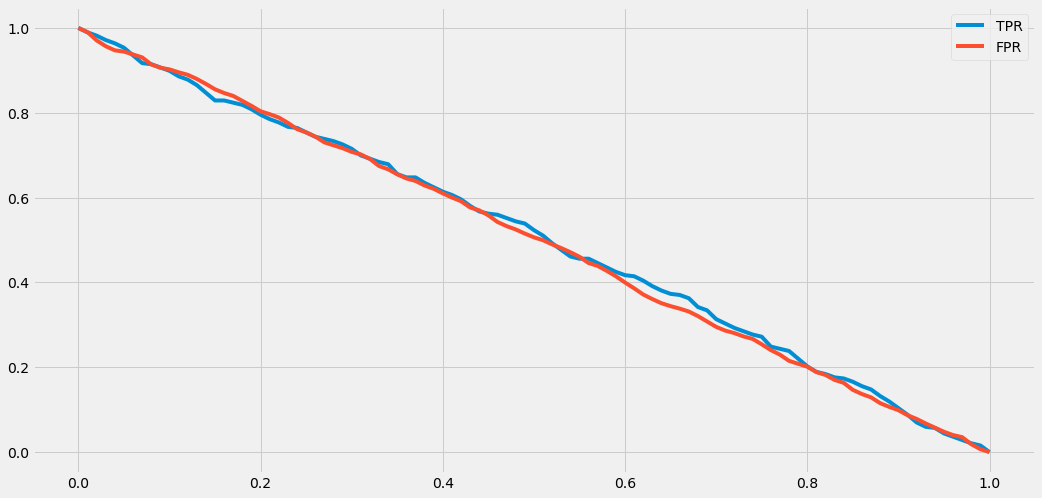

In [22]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend();

[back to top](#table-of-contents)
<a id="5.2"></a>

<div style="background:#59a1c6;color:black; font-family:'Goudy Old Style';padding:0.5em;border-radius:0.2em;font-size:25px">5.2 Ideal model
    
</div>

In [23]:
"""Ideal model"""
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

y_ideal = np.repeat([0, 1], [num_neg, num_pos])

y_ideal_pred = np.linspace(0, 1, len(y_val))

In [24]:
1 - y_val.mean()

0.7260468417317246

In [25]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)

1.0

In [26]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


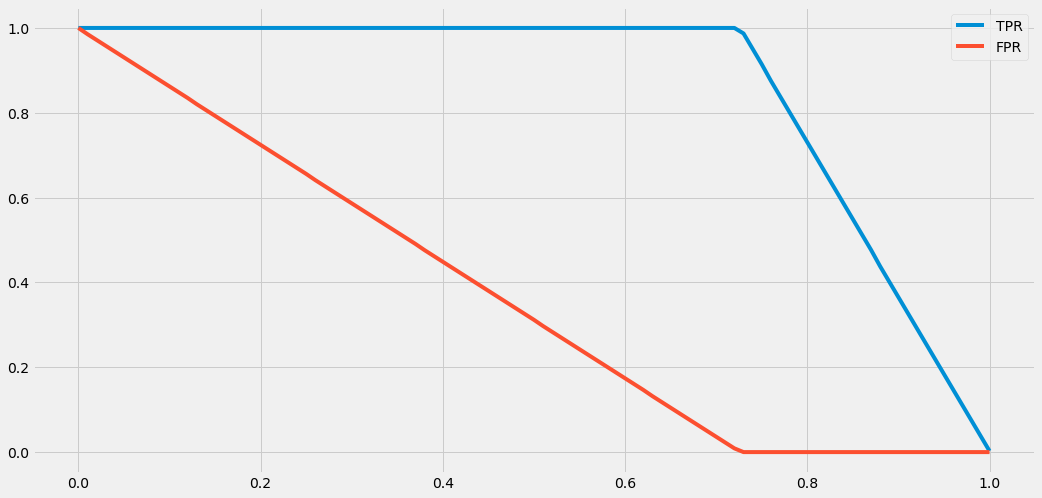

In [27]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

[back to top](#table-of-contents)
<a id="5.3"></a>

<div style="background:#59a1c6;color:black; font-family:'Goudy Old Style';padding:0.5em;border-radius:0.2em;font-size:25px">5.3 Putting everything together
    
</div>

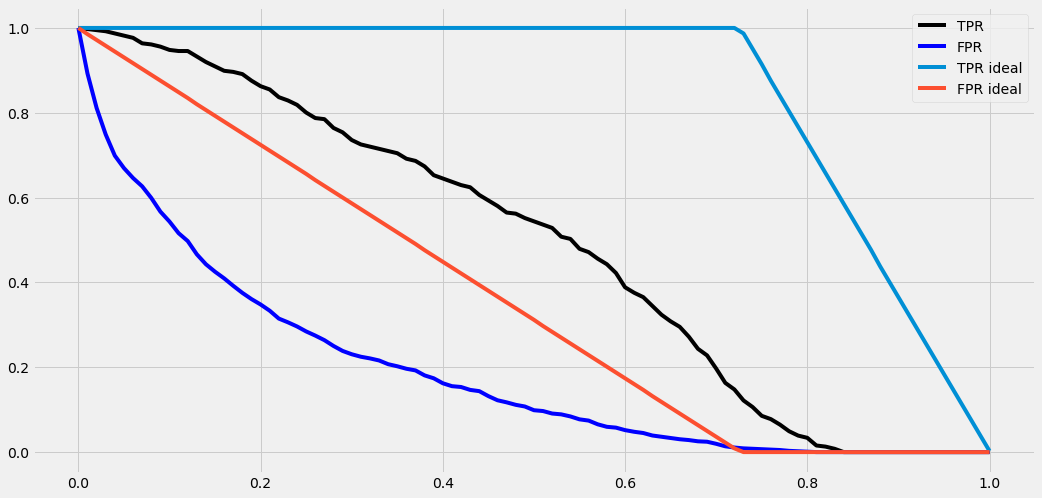

In [28]:
"""Putting everything together"""
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='blue')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR ideal')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR random', color='grey')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR random', color='grey')

plt.legend();

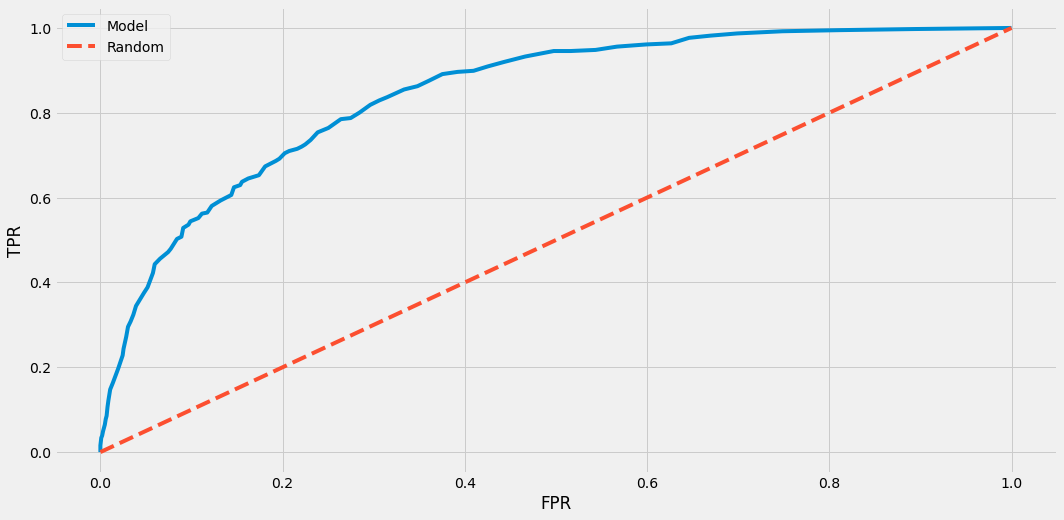

In [29]:
plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend();

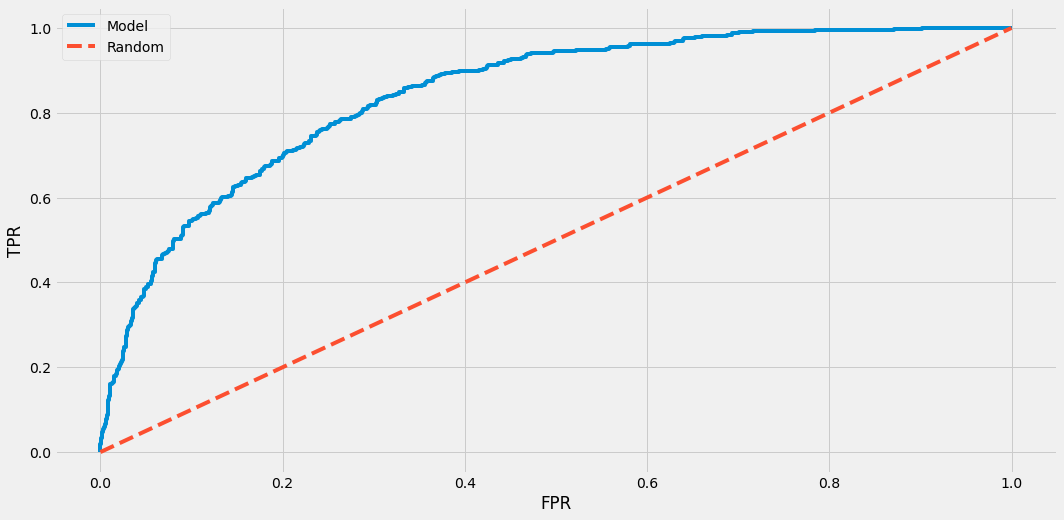

In [30]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend();

[back to top](#table-of-contents)
<a id="6"></a>

<div style="background:#2b6684;color:white; font-family:'Goudy Old Style';padding:0.5em;border-radius:0.2em;font-size:25px;color:yellow">6. AUC
    
</div>

In [31]:
"""Area under Curve basically calculates the probability that a randomly selected positive class has higher score than randomly selected negative class"""
print(auc(fpr, tpr))  # Score from implementation
print(auc(df_scores.fpr, df_scores.tpr)) #score from sklearn model

0.8438479732980819
0.8438808948586651


In [32]:
auc(df_ideal.fpr, df_ideal.tpr)  # score from ideal model

0.9999430203759136

In [33]:
"""Calculating fpr and tpr using roc_curve from sklearn"""
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)                # Then calculating auc from fpr and tpr generated from previous step

0.8438479732980819

In [34]:
"""We can use sklearn roc_auc to calculate area under curve directly"""
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.8438479732980819

In [35]:
"""As discussed earlier: Area under Curve basically calculates the probability that a randomly selected positive class has higher score than 
randomly selected negative class

Let's implement that and see."""

neg = y_pred[y_val == 0]   # creating a variable negative to contain all -ve probabilities
pos = y_pred[y_val == 1]   # creating a variable positive to contain all +ve probabilities

In [36]:
"""
Randomly selecting postive and negetive class and checking. 
If we get postive probability greater than negative probability we increment the score by 1
Finally we take the fraction by dividing the success by total number of times we repeated experiment. 
We did the experiment 100000 times.
"""
import random
n = 100000
success = 0 

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.84675

In [37]:
"""Implementing it second time"""
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

0.84646


[back to top](#table-of-contents)
<a id="7"></a>

<div style="background:#2b6684;color:white; font-family:'Goudy Old Style';padding:0.5em;border-radius:0.2em;font-size:25px;color:yellow">7. Cross-Validation
    
</div>

In [38]:
"""
Evaluating the same model on different subsets of data
Getting the average prediction and the spread within predictions
"""

def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [39]:
!pip install tqdm

In [40]:
dv, model = train(df_train, y_train, C=0.001)
y_pred = predict(df_val, dv, model)

In [41]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [42]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.009
C=0.1 0.840 +- 0.007
C=0.5 0.841 +- 0.007
C=1 0.841 +- 0.008
C=5 0.841 +- 0.008
C=10 0.841 +- 0.007


In [43]:
scores

[0.8425595214732595,
 0.8458337471858032,
 0.8332972105157537,
 0.832634536675833,
 0.8508950142763014]

In [44]:
"""Now that we have the best parameter. Let's train the model using that"""
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259

In [45]:
import pickle

In [46]:
"""Storing the file in output_file"""
output_file = f'model_C = {C}.bin'
output_file

'model_C = 10.bin'

In [48]:
"""Opening the file with 'write' and 'binary' option"""
f_out = open(output_file, 'wb')


"""Since we have both dictVectorizer and model passed in parameters in our predict function we will also save dv (dictVectorizer) in the model file"""
pickle.dump((dv, model), f_out) # Storing our model in the file 
f_out.close() # Closing the file

In [49]:
"""Now closing file is very important and often missed and using with is good idea"""
with open(output_file, 'wb') as f_out:
  pickle.dump((dv, model), f_out)
  # do stuff

# once with is exited: file is closed


# Load the model

In [1]:
import pickle

In [3]:
model_file = 'model_C = 10.bin' 

In [4]:
"""
Changes:
- use the file name as specified file name when importing the file.
- instead of wb use rb 
- instead of f_out use f_in
- instead of dump use load
- finally use the variables to store dv, model i.e. output of our functions. No need to dv,model inside the function as before.
"""
with open(model_file, 'rb') as f_in:
  dv, model = pickle.load(f_in)

In [5]:
"""If sklearn is not installed this will not work. """
dv, model

(DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
                sparse=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False))

In [41]:
customer = df_train.iloc[1].to_dict()
y = df.churn.values

In [42]:
customer

{'contract': 'month-to-month',
 'customerid': '1960-uycnn',
 'dependents': 'no',
 'deviceprotection': 'yes',
 'gender': 'male',
 'internetservice': 'fiber_optic',
 'monthlycharges': 95.25,
 'multiplelines': 'yes',
 'onlinebackup': 'yes',
 'onlinesecurity': 'no',
 'paperlessbilling': 'yes',
 'partner': 'no',
 'paymentmethod': 'electronic_check',
 'phoneservice': 'yes',
 'seniorcitizen': 0,
 'streamingmovies': 'yes',
 'streamingtv': 'no',
 'techsupport': 'no',
 'tenure': 10,
 'totalcharges': 1021.55}

In [43]:
X = dv.transform([customer])

In [44]:
model.predict_proba(X)[0,1]

0.6793334583952361